https://programmers.co.kr/learn/courses/30/lessons/77485

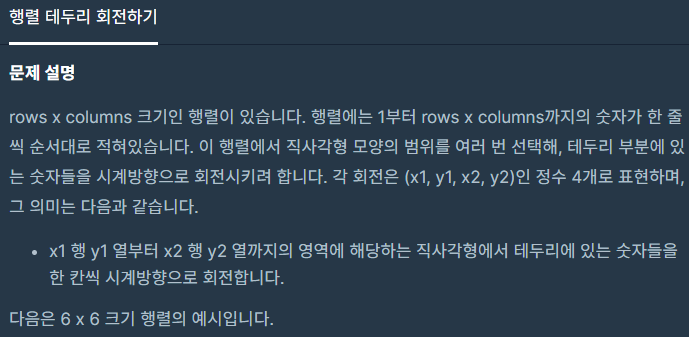
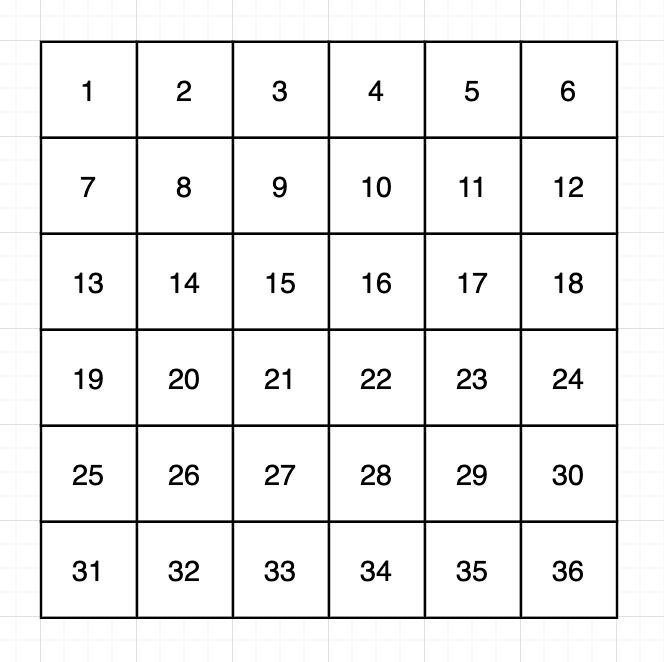
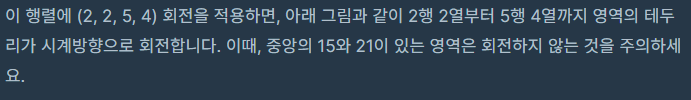
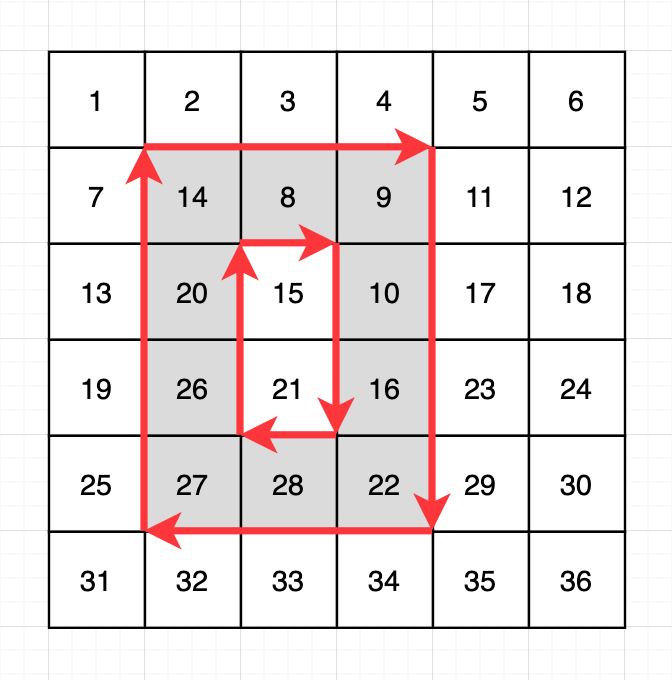
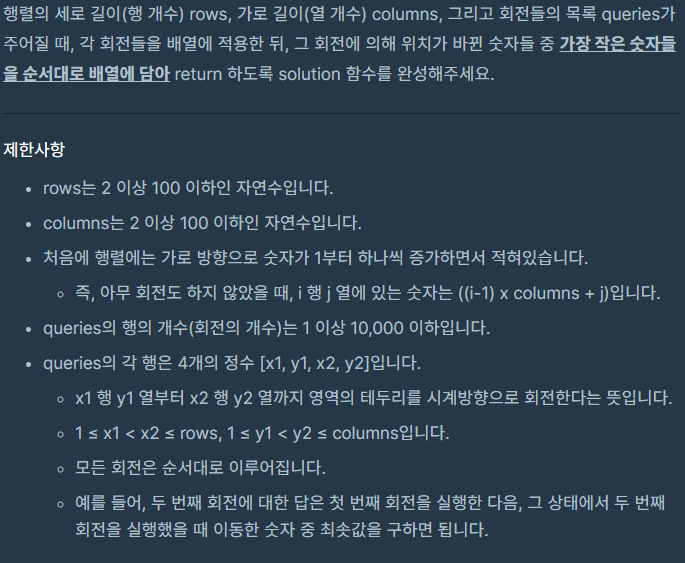
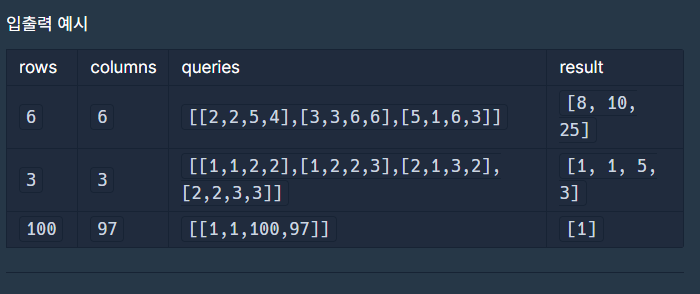
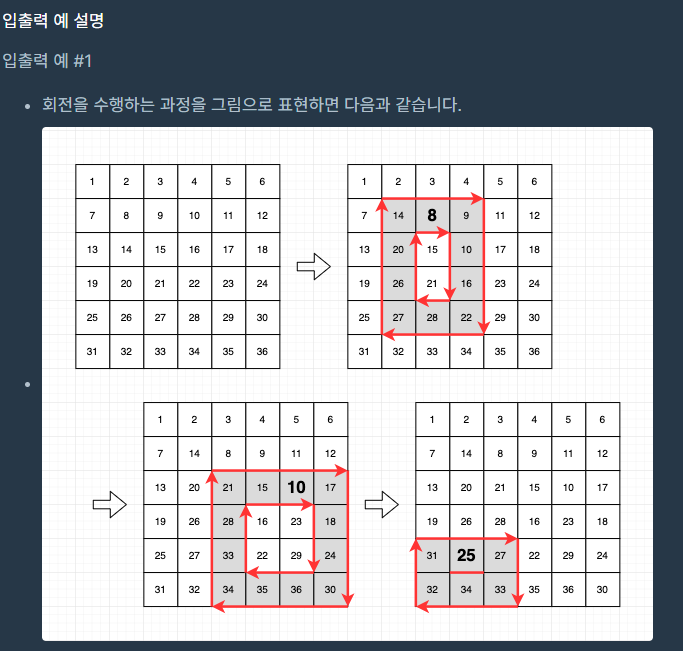
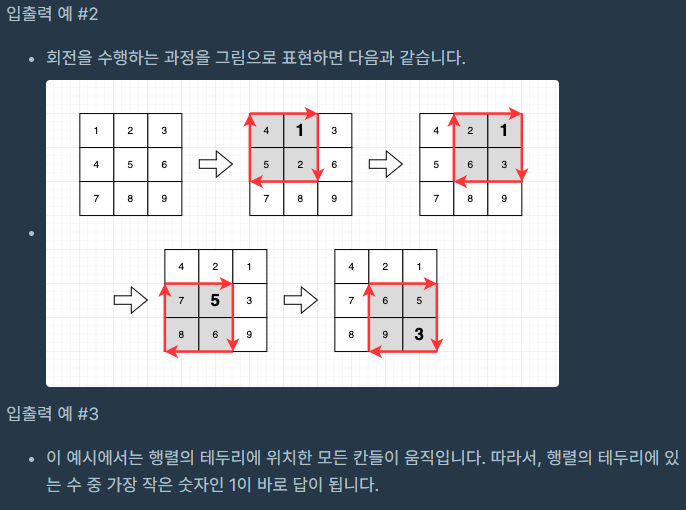

1. nested list에 원 행렬을 담은후
2. 회전한 값을 list 담은 후에 min 값을 return 값에 담는다.
3. list = list[1:]+list[0] 해준후 원래 nested list의 값을 업뎃 해준다.
4. 반복

rows	columns	queries	result

```
6	6	[[2,2,5,4],[3,3,6,6],[5,1,6,3]]	[8, 10, 25]
3	3	[[1,1,2,2],[1,2,2,3],[2,1,3,2],[2,2,3,3]]	[1, 1, 5, 3]
100	97	[[1,1,100,97]]	[1]
```

In [1]:
rows, columns, queries = 6 ,   6  ,  [[2,2,5,4],[3,3,6,6],[5,1,6,3]]  

In [2]:
# nested list에 담기

In [3]:
import numpy as np
m = np.array(np.arange(1, rows*columns+1)).reshape(rows, columns)
m

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29, 30],
       [31, 32, 33, 34, 35, 36]])

In [4]:
a, b, c, d = [ 2, 2, 5, 4]
a, b, c, d = a-1, b-1, c-1, d-1

In [5]:
# l = (m[a][b:d+1]).tolist() + (m[c+1][d]).tolist() + 

In [6]:
m2 = m[a:c+1][:, b:d+1]

In [7]:
m2

array([[ 8,  9, 10],
       [14, 15, 16],
       [20, 21, 22],
       [26, 27, 28]])

In [8]:
l = (m2[0,:]).tolist() + m2[1:-1,-1].tolist() + (m2[-1,:].tolist()[::-1]) + m2[1:-1,0].tolist()[::-1]

In [9]:
l

[8, 9, 10, 16, 22, 28, 27, 26, 20, 14]

In [10]:
l = l[-1:] +  l[:-1] 
l

[14, 8, 9, 10, 16, 22, 28, 27, 26, 20]

In [11]:
m2[0,:] = l[:len(m2[0,:])]
l = l[len(m2[0, :]):]
print(l)
m2

[10, 16, 22, 28, 27, 26, 20]


array([[14,  8,  9],
       [14, 15, 16],
       [20, 21, 22],
       [26, 27, 28]])

In [12]:
m2[1:-1,-1] = l[:len(m2[1:-1,-1])]
l = l[len(m2[1:-1,-1]):]
print(l)
m2

[22, 28, 27, 26, 20]


array([[14,  8,  9],
       [14, 15, 10],
       [20, 21, 16],
       [26, 27, 28]])

In [13]:
m2[-1,:] = l[:len(m2[-1,:])][::-1]
l = l[len(m2[-1,:]):]
print(l)
m2

[26, 20]


array([[14,  8,  9],
       [14, 15, 10],
       [20, 21, 16],
       [27, 28, 22]])

In [14]:
 m2[1:-1,0] = l[:len( m2[1:-1,0])][::-1]
l = l[len( m2[1:-1,0]):]
print(l)
m2

[]


array([[14,  8,  9],
       [20, 15, 10],
       [26, 21, 16],
       [27, 28, 22]])

In [15]:
m[a:c+1][:, b:d+1] = m2

In [16]:
m

array([[ 1,  2,  3,  4,  5,  6],
       [ 7, 14,  8,  9, 11, 12],
       [13, 20, 15, 10, 17, 18],
       [19, 26, 21, 16, 23, 24],
       [25, 27, 28, 22, 29, 30],
       [31, 32, 33, 34, 35, 36]])

In [17]:
def solution(rows, columns, queries):
    import numpy as np
    result = []
    
    m = np.array(np.arange(1, rows*columns+1)).reshape(rows, columns)
    for query in queries:
        a, b, c, d = query
        a, b, c, d = a-1, b-1, c-1, d-1
        m2 = m[a:c+1][:, b:d+1]
        l = m2[0,:].tolist() + m2[1:-1,-1].tolist() + (m2[-1,:].tolist()[::-1]) + m2[1:-1,0].tolist()[::-1]
        result.append(min(l))
        
        l = l[-1:] +  l[:-1] 
        
        m2[0,:] = l[:len(m2[0,:])]
        l = l[len(m2[0, :]):]
        
        m2[1:-1,-1] = l[:len(m2[1:-1,-1])]
        l = l[len(m2[1:-1,-1]):]
        
        m2[-1,:] = l[:len(m2[-1,:])][::-1]
        l = l[len(m2[-1,:]):]
        
        m2[1:-1,0] = l[:len( m2[1:-1,0])][::-1]
        l = l[len( m2[1:-1,0]):]
        
        m[a:c+1][:, b:d+1] = m2
        
    return result
        